<a href="https://colab.research.google.com/github/Daniel-S0ng/crawl/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Demo of Keras

This is a Keras demostration code for a three layer (dense) neural network on the MNIST dataset.

## Setting Up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers


## Import Dataset

We download the MNIST dataset, which consists of small images of hand-written digits and their corresponding labels (what digit each represents).

In total, we have 70,000 pairs of digit images and labels, where each image is 28x28 pixels. We split the total dataset into two sets: one for training and the other for testing. We will optimize our network on the training dataset, and evaluate its performance on the testing set (which our model has never been trained on before).

Some code is borrowed from [here](https://www.tensorflow.org/tutorials/)


In [11]:
# 1. Imports, data loading, and preprocessing
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print("labels for the first five examples: \n", y_train[0:5])

# convert index labels to one-hot encoding labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

print("one-hot labels for the first five examples: \n", y_train[0:5])

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
labels for the first five examples: 
 [5 0 4 1 9]
one-hot labels for the first five examples: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Visualizing the data

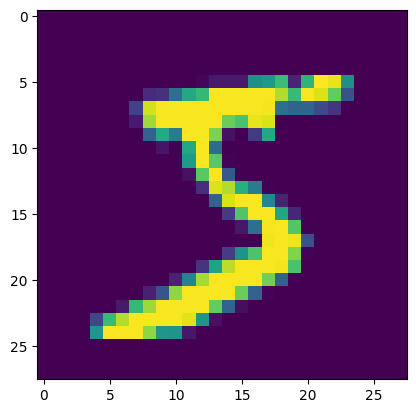

In [3]:
plt.imshow(x_train[0,:,:])
plt.show()

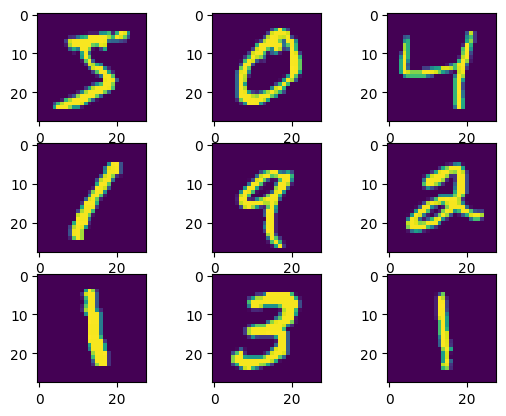

In [4]:
fig, axes = plt.subplots(3,3)

counter = 0
for x in range(3):
  for y in range(3):
    axes[x,y].imshow(x_train[counter])
    counter += 1

plt.show()

## Define the Model (Neural Network)

We will define our model, which consists of two hidden layers: the first layer is a hidden layer with output size 512, and the second is a hidden layer with output size 128, followed by an output layer with output size 10 matching the number of unique digits in our dataset. This is similar to the* model *function that we define in the python implementation.

Note that the output layer does not have any activation function as in our python implementation. The output is then called *logit*. In that case, the cross-entropy loss below need to use the flag *from_logits=True*. However, we could also use the softmax activation function on the ouput layer. Then, the output is a probability prediction vector. So, when we feed that output in the cross-entropy loss,  use the flag *from_logits=false*.

For more information, see [here](https://keras.io/models/about-keras-models/) on how to define a sequential model (the example below) or see [here](https://keras.io/getting-started/functional-api-guide/) on how to utilize the functional API (more advanced, but allows multi-head networks).

In [5]:
# 2. Model creation function

def create_model(initializer, regularizer):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu,
                              kernel_initializer=initializer, kernel_regularizer=regularizer),
        tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
        tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    ])
    return model

In [6]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])



With the model defined, we can pass the image through the network and see the outputs! This also allows us to  look at the model weights or the summary of the model.


Predicted label:  [[ 0.12932189 -0.19487159 -0.0424256  -0.13192153  0.15641707  0.30105576
   0.14486371  0.38124305  0.01513135 -0.4819315 ]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (1, 784)                  0         
                                                                 
 dense (Dense)               (1, 512)                  401920    
                                                                 
 dense_1 (Dense)             (1, 128)                  65664     
                                                                 
 dense_2 (Dense)             (1, 10)                   1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


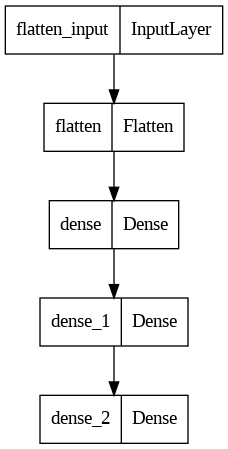

In [7]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

## Train the network

We train the network using *model.fit*, which is similar to the *minibatch_train* function of our python code.

We define the optimizer and learning rate, the loss function, and the error mtrics in *model.complile.* More optimizers can be found [here](https://keras.io/api/optimizers/) and more losses can be found [here](https://keras.io/api/losses/). Then, *model.fit* trains the model with specified batch_size and epochs.

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


422/422 [==============================] - 5s 7ms/step - loss: 2.2463 - accuracy: 0.2865 - val_loss: 2.0649 - val_accuracy: 0.5378
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 1.9083 - accuracy: 0.6366 - val_loss: 1.7175 - val_accuracy: 0.7383
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 1.5770 - accuracy: 0.7428 - val_loss: 1.3808 - val_accuracy: 0.8082
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 1.2866 - accuracy: 0.7855 - val_loss: 1.1132 - val_accuracy: 0.8392
Epoch 5/10
422/422 [==============================] - 3s 6ms/step - loss: 1.0714 - accuracy: 0.8087 - val_loss: 0.9249 - val_accuracy: 0.8613
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.9216 - accuracy: 0.8262 - val_loss: 0.7948 - val_accuracy: 0.8750
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.8168 - accuracy: 0.8387 - val_loss: 0.7032 - val_accuracy: 0.8840
Epoch 8/10
422/42

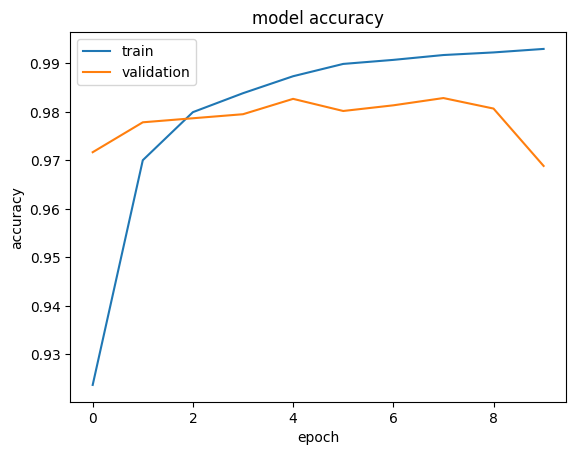

In [8]:
# 3. Parameter settings and early stopping

batch_size = 128
epochs = 10
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
initializer = tf.keras.initializers.GlorotUniform()
regularizer = tf.keras.regularizers.L2(0.0001)

# 4. Experiment with different optimizers and learning rates

optimizer_options = [keras.optimizers.SGD, keras.optimizers.Adam, keras.optimizers.RMSprop]
learning_rate_options = [0.001, 0.01, 0.1]
results_optimizers = {}

for optimizer in optimizer_options:
    for lr in learning_rate_options:
        model = create_model(initializer, regularizer)
        opt = optimizer(learning_rate=lr)
        model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])
        model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])
        test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)[1]
        results_optimizers[(optimizer, lr)] = test_accuracy

# 5. Select the best optimizer and learning rate, then re-train

best_optimizer_config = max(results_optimizers, key=results_optimizers.get)
best_optimizer, best_lr = best_optimizer_config

model = create_model(initializer, regularizer)
opt = best_optimizer(learning_rate=best_lr)
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##Evaluate model on the test dataset

We test the model using *model.evaluate*, which returns the test loss and accuracy. The test label need to be one-hot encoding.

In [9]:
test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)[1]
total_parameters = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_variables])
r = test_accuracy / np.power(total_parameters, 1/10)
print("Ratio r:", r)

Ratio r: 0.2613344245548708


## Visualize some examples of wrong predictions

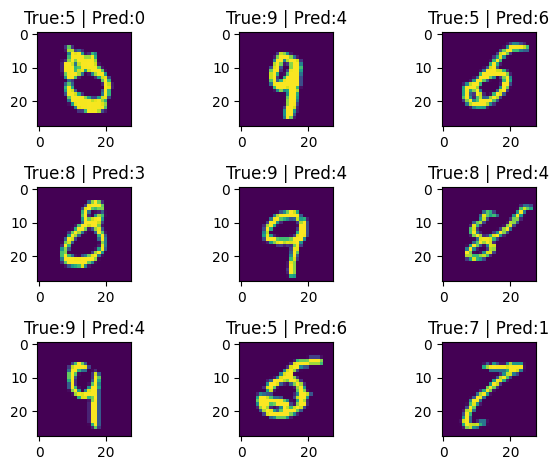

In [10]:
# we explicitly compute the prediction on the test dataset
# and check those with wrong predictions.
y_pred = []
y_true = []
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test,  y_test))
test_dataset  = test_dataset.batch(32)

for images, labels in test_dataset:
  logits = model(images).numpy()
  predictions = np.argmax(logits, axis=-1)

  y_pred.extend(predictions)
  y_true.extend(labels.numpy())

# Visualize predictions that the model got wrong

y_pred = np.array(y_pred)
y_true = np.array(y_true)
wrong_idxs = np.nonzero(y_pred - y_true)[0]
wrong_idxs = np.random.choice(wrong_idxs, size=9) # select a subset

count = 0
fig, axes = plt.subplots(3,3)
for x in range(3):
  for y in range(3):
    wrong_idx = wrong_idxs[count]
    count += 1

    axes[x,y].imshow(x_test[wrong_idx])
    axes[x,y].set_title('True:%d | Pred:%d' % (y_true[wrong_idx],
                                               y_pred[wrong_idx]))

plt.tight_layout()
plt.show()